In [1]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
np.random.seed(42)


In [3]:
A_group = np.random.binomial(n=1, p=0.10, size=1000)
B_group = np.random.binomial(n=1, p=0.15, size=1000)

In [4]:
A_group

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [5]:
B_group

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [6]:
conversion_rate_A = np.mean(A_group)
conversion_rate_B = np.mean(B_group)

In [7]:
conversion_rate_A

0.1

In [8]:
conversion_rate_B

0.152

In [19]:
A_result = pd.Series(A_group).describe()


In [20]:
B_result = pd.Series(B_group).describe()


In [21]:
A_result

,0
count,1000.00000
mean,0.10000
std,0.30015
min,0.00000
25%,0.00000
50%,0.00000
75%,0.00000
max,1.00000


In [22]:
B_result

,0
count,1000.000000
mean,0.152000
std,0.359201
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [11]:
t_stat, p_val = ttest_ind(A_group, B_group, equal_var=True)


In [12]:
t_stat

-3.512911226002963

In [13]:
p_val

0.00045307617112501104

In [15]:
data = pd.DataFrame({
    'Group': ['Control A'] * len(A_group) + ['Experimental B'] * len(B_group),
    'Conversion': np.concatenate([A_group, B_group])
})


<ipython-input-16-d779908ea1ac>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Group', y='Conversion', data=data, ci=None)


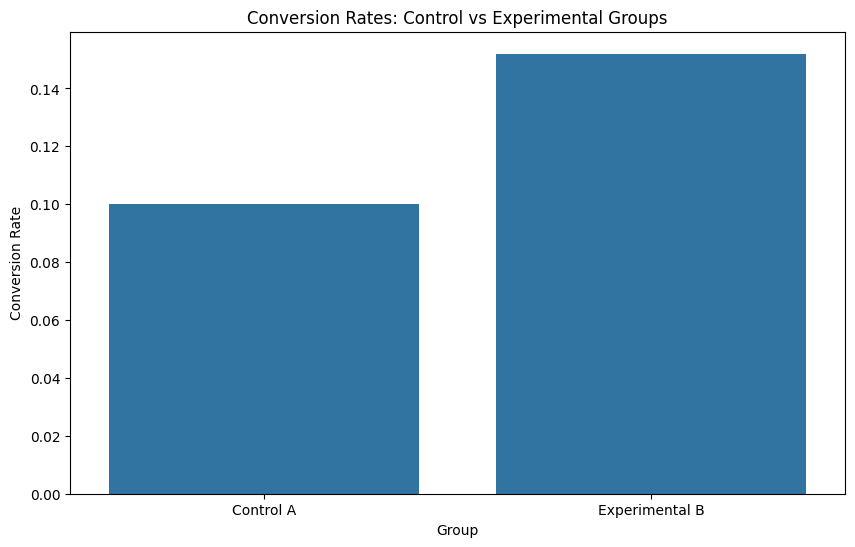

In [16]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Group', y='Conversion', data=data, ci=None)
plt.title('Conversion Rates: Control vs Experimental Groups')
plt.ylabel('Conversion Rate')
plt.show()

In [31]:
print("Control Group A Result Statistics:")
print(A_result)
print("\nExperimental Group B Result Statistics:")
print(B_result)
print(f"\nControl Group A: Conversion Rate = {conversion_rate_A:.2%}")
print(f"Experimental Group B: Conversion Rate = {conversion_rate_B:.2%}")
print(f"Independent t-test: t-statistic = {t_stat:.2f}, p-value = {p_val:.4f}")


Control Group A Result Statistics:
count    1000.00000
mean        0.10000
std         0.30015
min         0.00000
25%         0.00000
50%         0.00000
75%         0.00000
max         1.00000
dtype: float64

Experimental Group B Result Statistics:
count    1000.000000
mean        0.152000
std         0.359201
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
dtype: float64

Control Group A: Conversion Rate = 10.00%
Experimental Group B: Conversion Rate = 15.20%
Independent t-test: t-statistic = -3.51, p-value = 0.0005


In [32]:
if p_val < 0.05:
    print("\nThe result is statistically significant, indicating a difference between the groups.")
else:
    print("\nThe result is not statistically significant, indicating no difference between the groups.")




The result is statistically significant, indicating a difference between the groups.


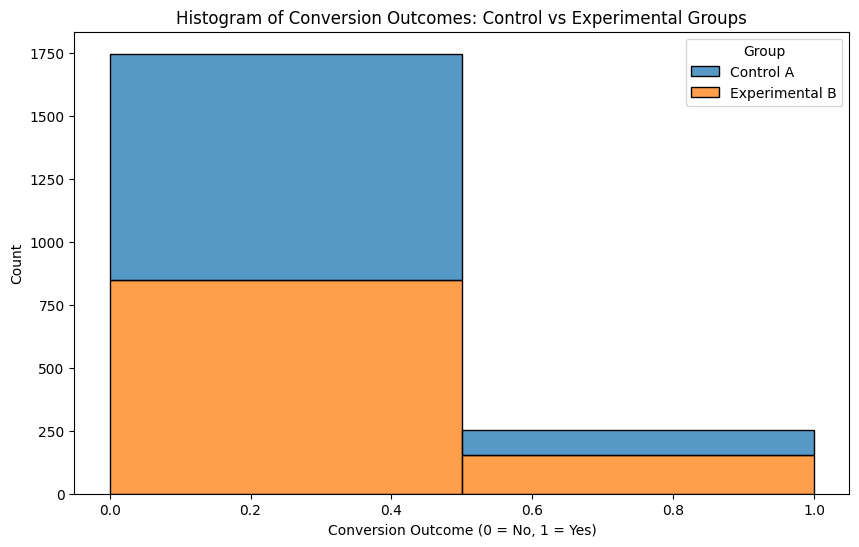

In [35]:
plt.figure(figsize=(10, 6))
sns.histplot(data, x='Conversion', hue='Group', multiple='stack', bins=2)
plt.title('Histogram of Conversion Outcomes: Control vs Experimental Groups')
plt.xlabel('Conversion Outcome (0 = No, 1 = Yes)')
plt.show()


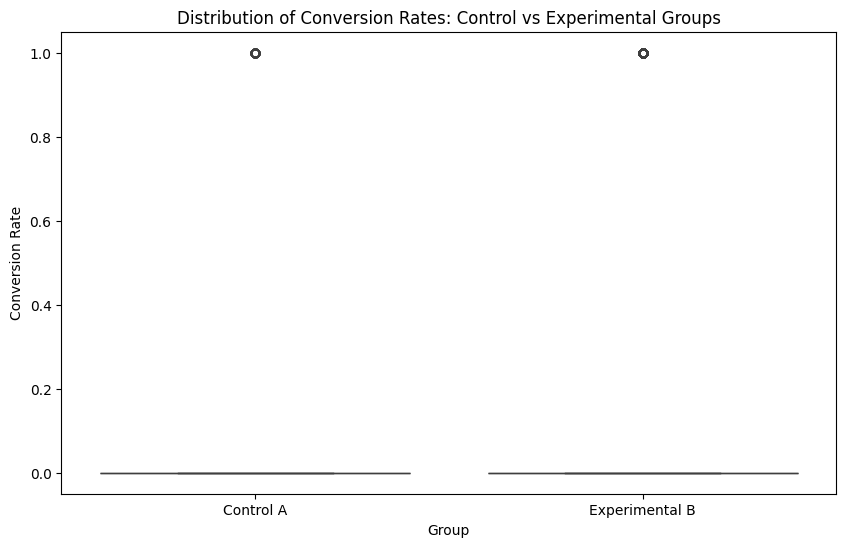